<a href="https://www.kaggle.com/code/vanpatangan/forecast-bitcoin-future-price?scriptVersionId=208344412" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import libraries and files

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import file
btc_day = pd.read_csv('/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_1d_data_2018_to_2024-2024-10-10.csv')
btc_four = pd.read_csv('/kaggle/input/bitcoin-historical-datasets-2018-2024/btc_4h_data_2018_to_2024-2024-10-10.csv')

# Concatenate files
btc_data = pd.concat([btc_day, btc_four], axis=0, ignore_index=True)

# Explore and preprocess 

In [3]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17305 entries, 0 to 17304
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open time                     17305 non-null  object 
 1   Open                          17305 non-null  float64
 2   High                          17305 non-null  float64
 3   Low                           17305 non-null  float64
 4   Close                         17305 non-null  float64
 5   Volume                        17305 non-null  float64
 6   Close time                    17305 non-null  object 
 7   Quote asset volume            17305 non-null  float64
 8   Number of trades              17305 non-null  int64  
 9   Taker buy base asset volume   17305 non-null  float64
 10  Taker buy quote asset volume  17305 non-null  float64
 11  Ignore                        17305 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.6+ MB


In [4]:
# Select only date and close columns 
btc_data = btc_data[['Open time', 'Close']].copy()

# Rename the columns 
btc_data = btc_data.rename(columns={'Open time': 'ds', 'Close': 'y'})

# Convert format to datetime  and remove timezones
btc_data['ds'] = pd.to_datetime(btc_data['ds'], errors='coerce').dt.tz_localize(None)

# Check the range of dates
print(btc_data['ds'].min(), btc_data['ds'].max())


2018-01-01 00:00:00 2024-09-06 00:00:00


In [5]:
# Convert y column to float type for numerical operations 
btc_data['y'] = btc_data['y'].astype(float)

# Remove rows containing NaN
btc_data.dropna(inplace=True)

In [6]:
btc_data

,ds,y
0,2018-01-01,13380.00
1,2018-01-02,14675.11
2,2018-01-03,14919.51
3,2018-01-04,15059.54
4,2018-01-05,16960.39
...,...,...
2436,2024-09-02,59132.13
2437,2024-09-03,57487.73
2438,2024-09-04,57970.90
2439,2024-09-05,56180.00


# Modeling and prediction

In [7]:
# Initialize model
model = Prophet()

# Train model
model.fit(btc_data)

07:57:18 - cmdstanpy - INFO - Chain [1] start processing
07:57:19 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# Create a dataframe for forecasting a year after the training data ends 
future = model.make_future_dataframe(periods=365)

In [9]:
# Use trained model for prediction
forecast = model.predict(future)

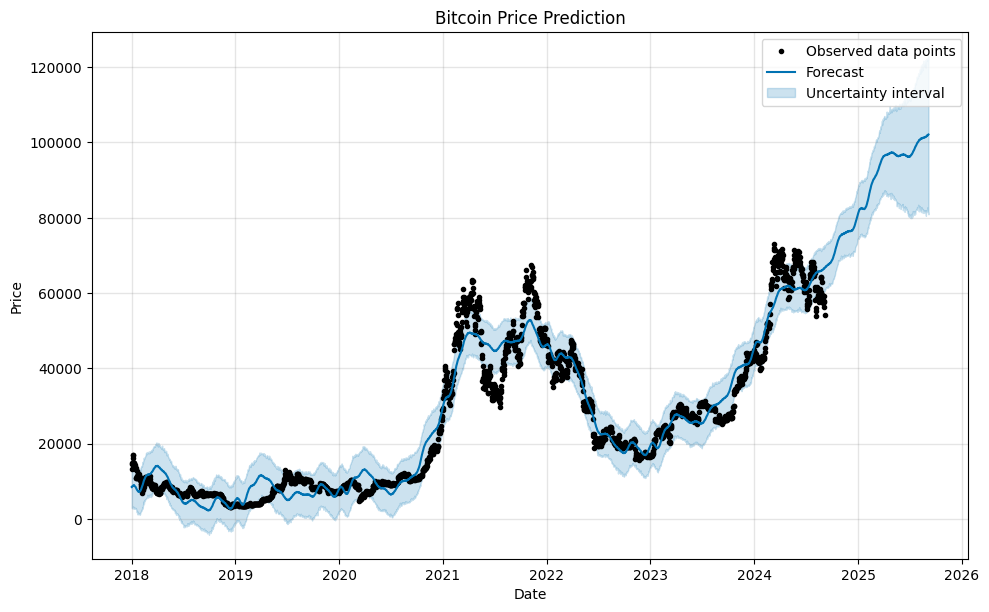

In [10]:
# Visualize forecast
fig = model.plot(forecast)
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:
# Show last 5 predicted prices
forecast[['ds','yhat', 'yhat_upper','yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
2801,2025-09-02,101797.657094,122164.526680,82748.450148
2802,2025-09-03,101926.065538,122230.259446,81814.235620
2803,2025-09-04,101905.100492,121920.216850,81551.379074
2804,2025-09-05,101981.906701,122962.190582,81411.443527
2805,2025-09-06,102103.058529,122340.842422,80901.108963


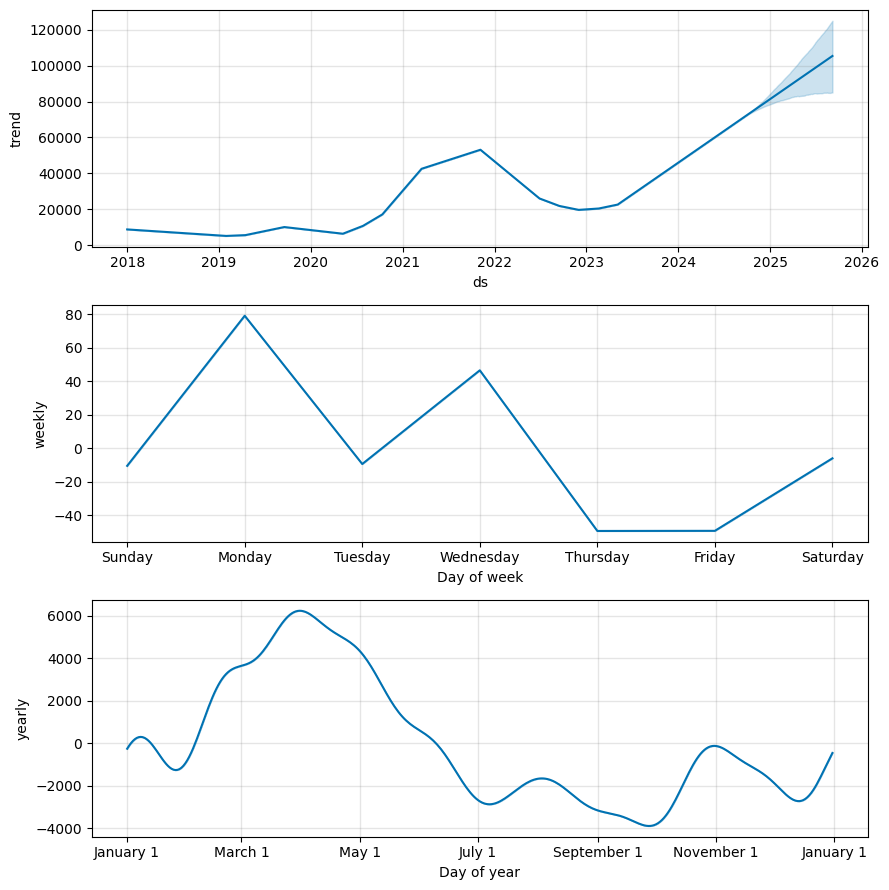

In [12]:
# Visualize trends and seasonality components 
fig = model.plot_components(forecast)